In [79]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [80]:
# data source

infos = 'https://raw.githubusercontent.com/olivierla412/Files/main/breast%20cancer.csv'

In [81]:
# Get the csv data here and print head

data = pd.read_csv(infos)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [82]:
# Print summary

print('\n Shape     =====>',data.shape,'\n')
print('Each column and data type and its count:','\n')
print(data.info())


 Shape     -------> (569, 33) 

Each column and data type and its count: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  text

In [83]:
# Drop Alert1 : Unnamed: 32  column has all nulls safe to remove the column

data = data.drop(['Unnamed: 32'],axis=1)

In [84]:
## Let's see the DataFrame statistic

data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [85]:
## checking for null values

#data.isnull().sum()

In [86]:
## To see the count quantitis of (B) and (M)

print('Belign Tumor(B) ===>',data.diagnosis.value_counts()[0])
print('Malignant Tumor(M) ===>',data.diagnosis.value_counts()[1])

Belign Tumor(B) ===> 357
Malignant Tumor(M) ===> 212


<function matplotlib.pyplot.show(close=None, block=None)>

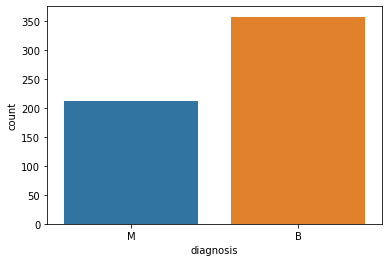

In [87]:
# Plot each Class frequency
sns.countplot(x='diagnosis',data=data)
plt.show

In [ ]:
data.shape

### Visualize the data distribution and analyse the skewness or __Outliers__

In [88]:
# We don't need to visualize the label, seperating only features into new DataFrame

df_features = data.drop(['id','diagnosis'], axis=1)



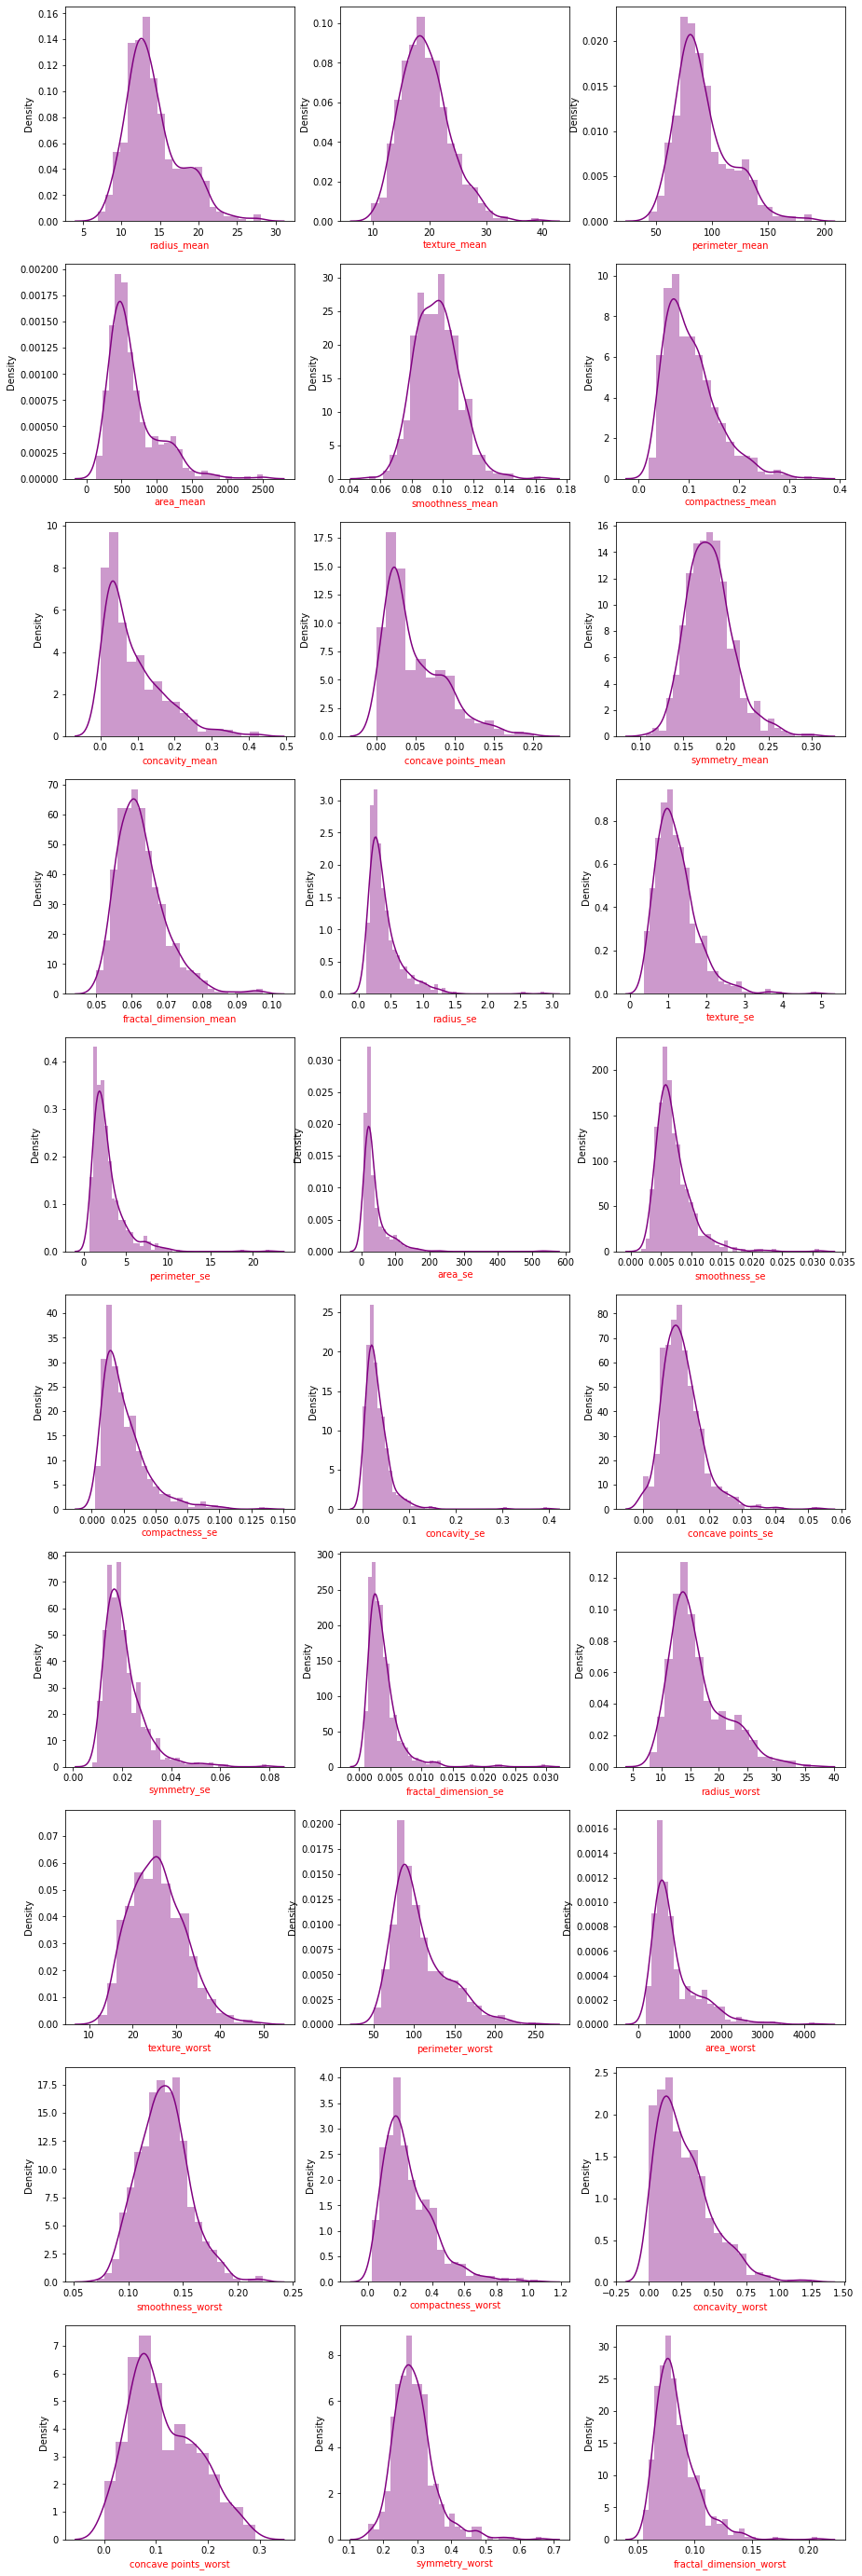

In [91]:
## let's plot data distribution using  distplot
plt.figure(figsize=(15,50))
plotnumber = 1

for column in df_features:
    if plotnumber <= 30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(df_features[column],color='purple')
        plt.xlabel(column,color ='r',fontsize = 10)
    plotnumber+=1
plt.show()    
    

In [92]:
df_features.shape

(569, 30)

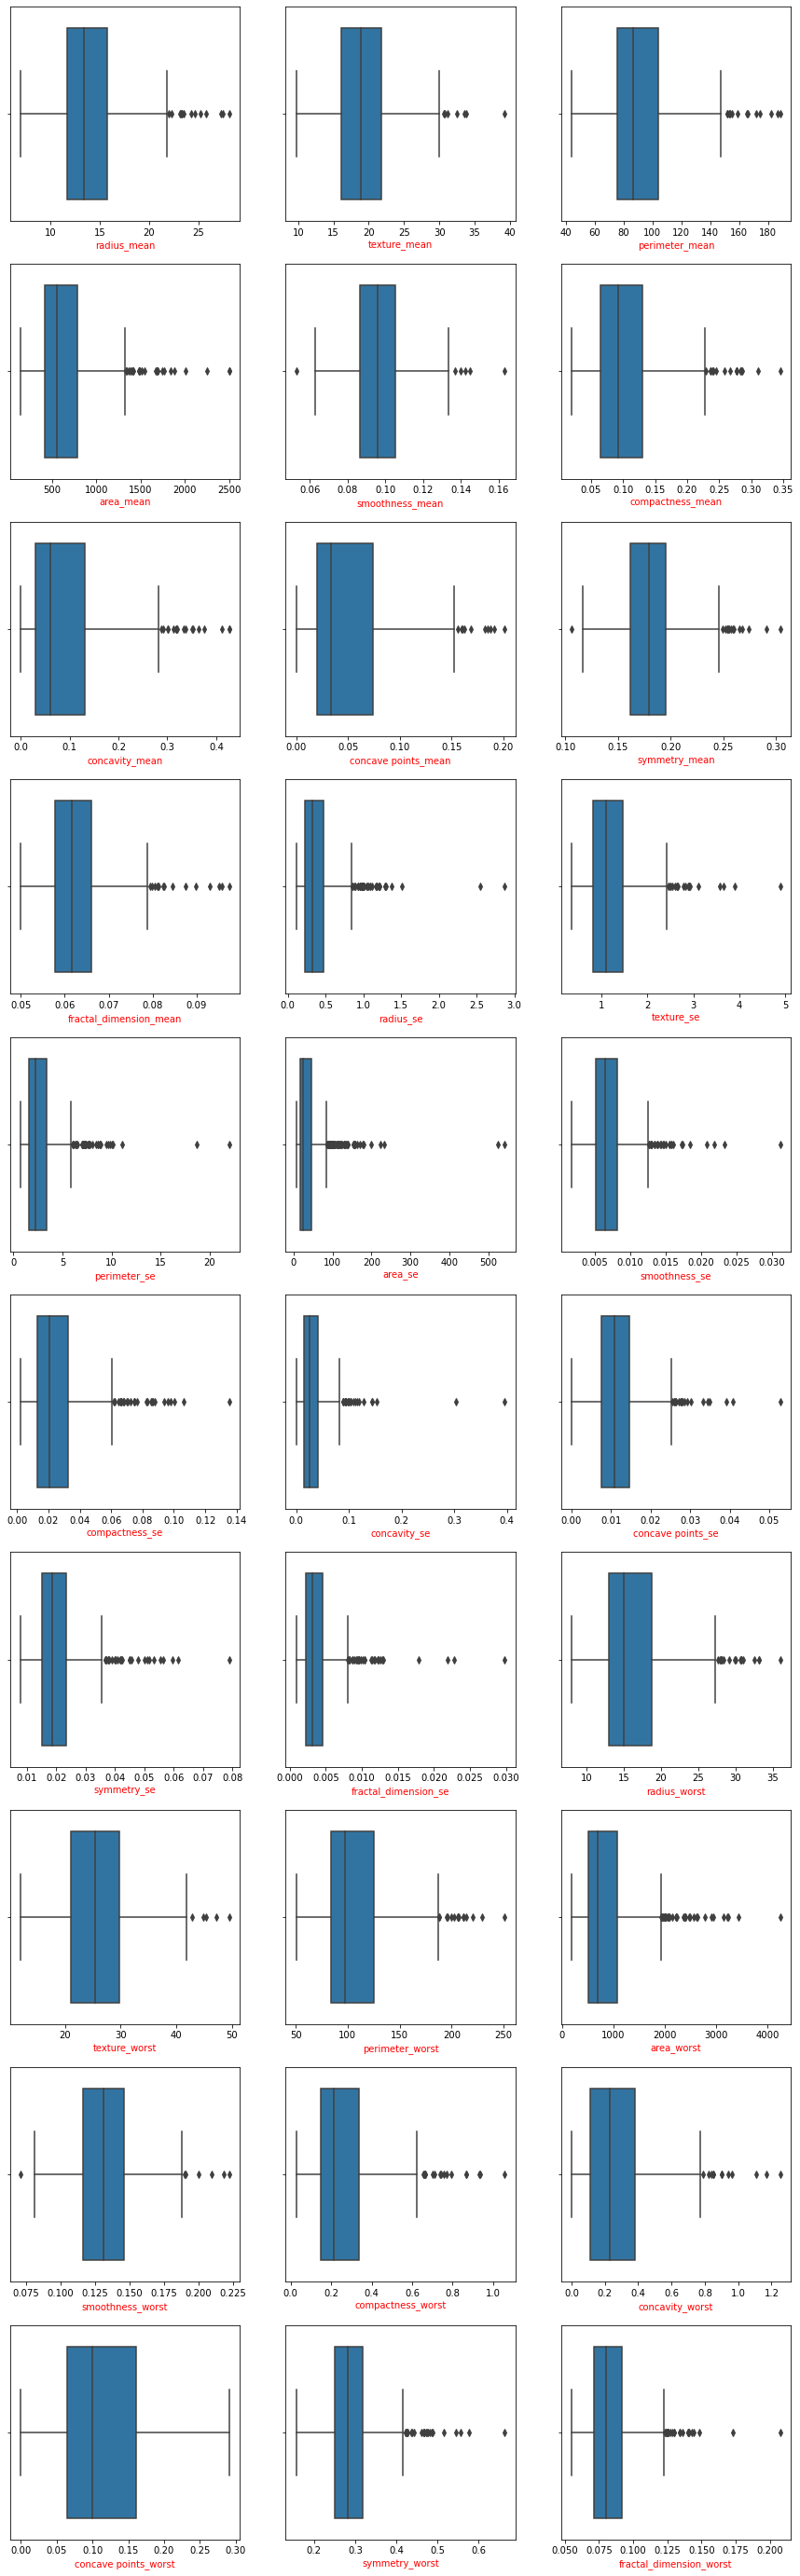

In [93]:
## let's plot data distribution

plt.figure(figsize=(15, 50))

graph = 1

for column in df_features:
    if graph <= 30:
        ax = plt.subplot(10,3,graph)
        sns.boxplot(df_features[column],orient='h')
        plt.xlabel(column,color ='r',fontsize = 10)
    graph+=1
plt.show()   

### Outlier Dectection Formula

##### __Higher side ===> Q3 + (1.5 * IQR)__
##### __lower side ===> Q1 - (1.5 * IQR)__
##### __IQR = Inter Quantile Rate = Q3 - Q1__

In [94]:
## Find the IQR ( Inter Quantile Range) to identify oulier

# 1st quantile
q1 = data.quantile(0.25)

# 3rd quantile
q3 = data.quantile(0.75)

#IQR 
iqr = q3 - q1

In [95]:
# Validation one outlier
rad_mean_high = (q3.radius_mean + (1.5 * iqr.radius_mean))
rad_mean_high

21.9

##### This means from the column __radius_mean__ all the record values greater __than 21.9__ (radius_mean > 21.9) are Outliers

### Let's remove the Outlier Higher side 

In [96]:
index = np.where(data['radius_mean'] > rad_mean_high)
index

(array([ 82, 108, 122, 164, 180, 202, 212, 236, 339, 352, 369, 461, 503,
        521]),)

In [97]:
## just to verify at index 82 values 

data['radius_mean'].head(84)

## from the output it is 25.22 > 21.9  so True

0     17.99
1     20.57
2     19.69
3     11.42
4     20.29
      ...  
79    12.86
80    11.45
81    13.34
82    25.22
83    19.10
Name: radius_mean, Length: 84, dtype: float64

In [98]:
## Let's drop those indexes from the dataset

data = data.drop(data.index[index])

In [99]:
data.shape

(555, 32)

In [100]:
## reset the index

data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
551,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
552,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
553,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [101]:
index = np.where(data['texture_mean'] > (q3.texture_mean + (1.5 * iqr.texture_mean)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
544,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
545,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
546,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [102]:
index = np.where(data['perimeter_mean'] > (q3.perimeter_mean + (1.5 * iqr.perimeter_mean)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
544,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
545,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
546,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [103]:
index = np.where(data['area_mean'] > (q3.area_mean + (1.5 * iqr.area_mean)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
534,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
535,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
536,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [104]:
index = np.where(data['compactness_mean'] > (q3.compactness_mean + (1.5 * iqr.compactness_mean)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
3,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
4,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
522,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
523,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
524,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [105]:
index = np.where(data['concave points_mean'] > (q3['concave points_mean'] + (1.5 * iqr['concave points_mean'])))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
3,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
4,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
522,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
523,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
524,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [106]:
index = np.where(data['fractal_dimension_mean'] > (q3['fractal_dimension_mean'] + (1.5 * iqr['fractal_dimension_mean'])))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
3,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
4,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
511,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
512,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
513,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [107]:
index = np.where(data['radius_se'] > (q3.radius_se + (1.5 * iqr.radius_se)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
3,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
4,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
494,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
495,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
496,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [108]:
index = np.where(data['texture_se'] > (q3.texture_se + (1.5 * iqr.texture_se)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
2,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
3,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
4,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
478,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
479,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
480,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [109]:
index = np.where(data['perimeter_se'] > (q3.perimeter_se + (1.5 * iqr.perimeter_se)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
2,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
3,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
4,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
475,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
476,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
477,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [110]:
index = np.where(data['area_se'] > (q3.area_se + (1.5 * iqr.area_se)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
3,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
4,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
456,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
457,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
458,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [111]:
index = np.where(data['compactness_se'] > (q3.compactness_se + (1.5 * iqr.compactness_se)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
3,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
4,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
446,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
447,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
448,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [112]:
index = np.where(data['concavity_se'] > (q3.concavity_se + (1.5 * iqr.concavity_se)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
3,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
4,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
445,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
446,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
447,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [113]:
index = np.where(data['concave points_se'] > (q3['concave points_se'] + (1.5 * iqr['concave points_se'])))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
3,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
4,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
445,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
446,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
447,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [114]:
index = np.where(data['symmetry_se'] > (q3.symmetry_se + (1.5 * iqr.symmetry_se)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
3,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
4,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
434,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
435,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
436,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [115]:
index = np.where(data['fractal_dimension_se'] > (q3.fractal_dimension_se + (1.5 * iqr.fractal_dimension_se )))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
3,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
4,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
430,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
431,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
432,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [116]:
index = np.where(data['radius_worst'] > (q3.radius_worst  + (1.5 * iqr.radius_worst )))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
3,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
4,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
430,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
431,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
432,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [117]:
index = np.where(data['texture_worst'] > (q3.texture_worst  + (1.5 * iqr.texture_worst )))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
3,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
4,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
430,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
431,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
432,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [118]:
index = np.where(data['perimeter_worst'] > (q3.perimeter_worst  + (1.5 * iqr.perimeter_worst )))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
3,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
4,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
430,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
431,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
432,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [119]:
index = np.where(data['area_worst'] > (q3.area_worst + (1.5 * iqr.area_worst )))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
1,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
2,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
3,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
4,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.03323,...,19.190,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
427,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
428,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
429,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [120]:
index = np.where(data['concavity_worst'] > (q3.concavity_worst   + (1.5 * iqr.concavity_worst )))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
1,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
2,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
3,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
4,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.03323,...,19.190,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
427,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
428,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
429,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [121]:
index = np.where(data['concave points_worst'] > (q3['concave points_worst'] + (1.5 * iqr['concave points_worst'] )))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
1,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
2,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
3,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
4,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.03323,...,19.190,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
427,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
428,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
429,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


## Let's remove the Outlier Lower side 

In [122]:
index = np.where(data['smoothness_mean'] < (q1.smoothness_mean - (1.5 * iqr.smoothness_mean )))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
1,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
2,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
3,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
4,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.03323,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.14590,0.09975,0.2948,0.08452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,924934,B,10.29,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.20000,0.09127,0.2226,0.08283
426,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.65,22.88,67.88,347.3,0.1265,0.1200,0.01005,0.02232,0.2262,0.06742
427,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.36620,0.11050,0.2258,0.08004
428,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.13260,0.10480,0.2250,0.08321


In [123]:
index = np.where(data['symmetry_mean'] < (q1.symmetry_mean - (1.5 * iqr.symmetry_mean )))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
1,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
2,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
3,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
4,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.03323,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.14590,0.09975,0.2948,0.08452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,924934,B,10.29,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.20000,0.09127,0.2226,0.08283
426,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.65,22.88,67.88,347.3,0.1265,0.1200,0.01005,0.02232,0.2262,0.06742
427,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.36620,0.11050,0.2258,0.08004
428,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.13260,0.10480,0.2250,0.08321


In [124]:
index = np.where(data['smoothness_worst'] < (q1.smoothness_worst - (1.5 * iqr.smoothness_worst)))
data = data.drop(data.index[index])
data.reset_index(drop=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
1,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
2,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
3,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
4,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.03323,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.14590,0.09975,0.2948,0.08452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,924934,B,10.29,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.20000,0.09127,0.2226,0.08283
426,924964,B,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.65,22.88,67.88,347.3,0.1265,0.1200,0.01005,0.02232,0.2262,0.06742
427,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.36620,0.11050,0.2258,0.08004
428,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.13260,0.10480,0.2250,0.08321


In [125]:
data.shape

(430, 32)

In [126]:
features_new = data.drop(['id','diagnosis'],axis=1)

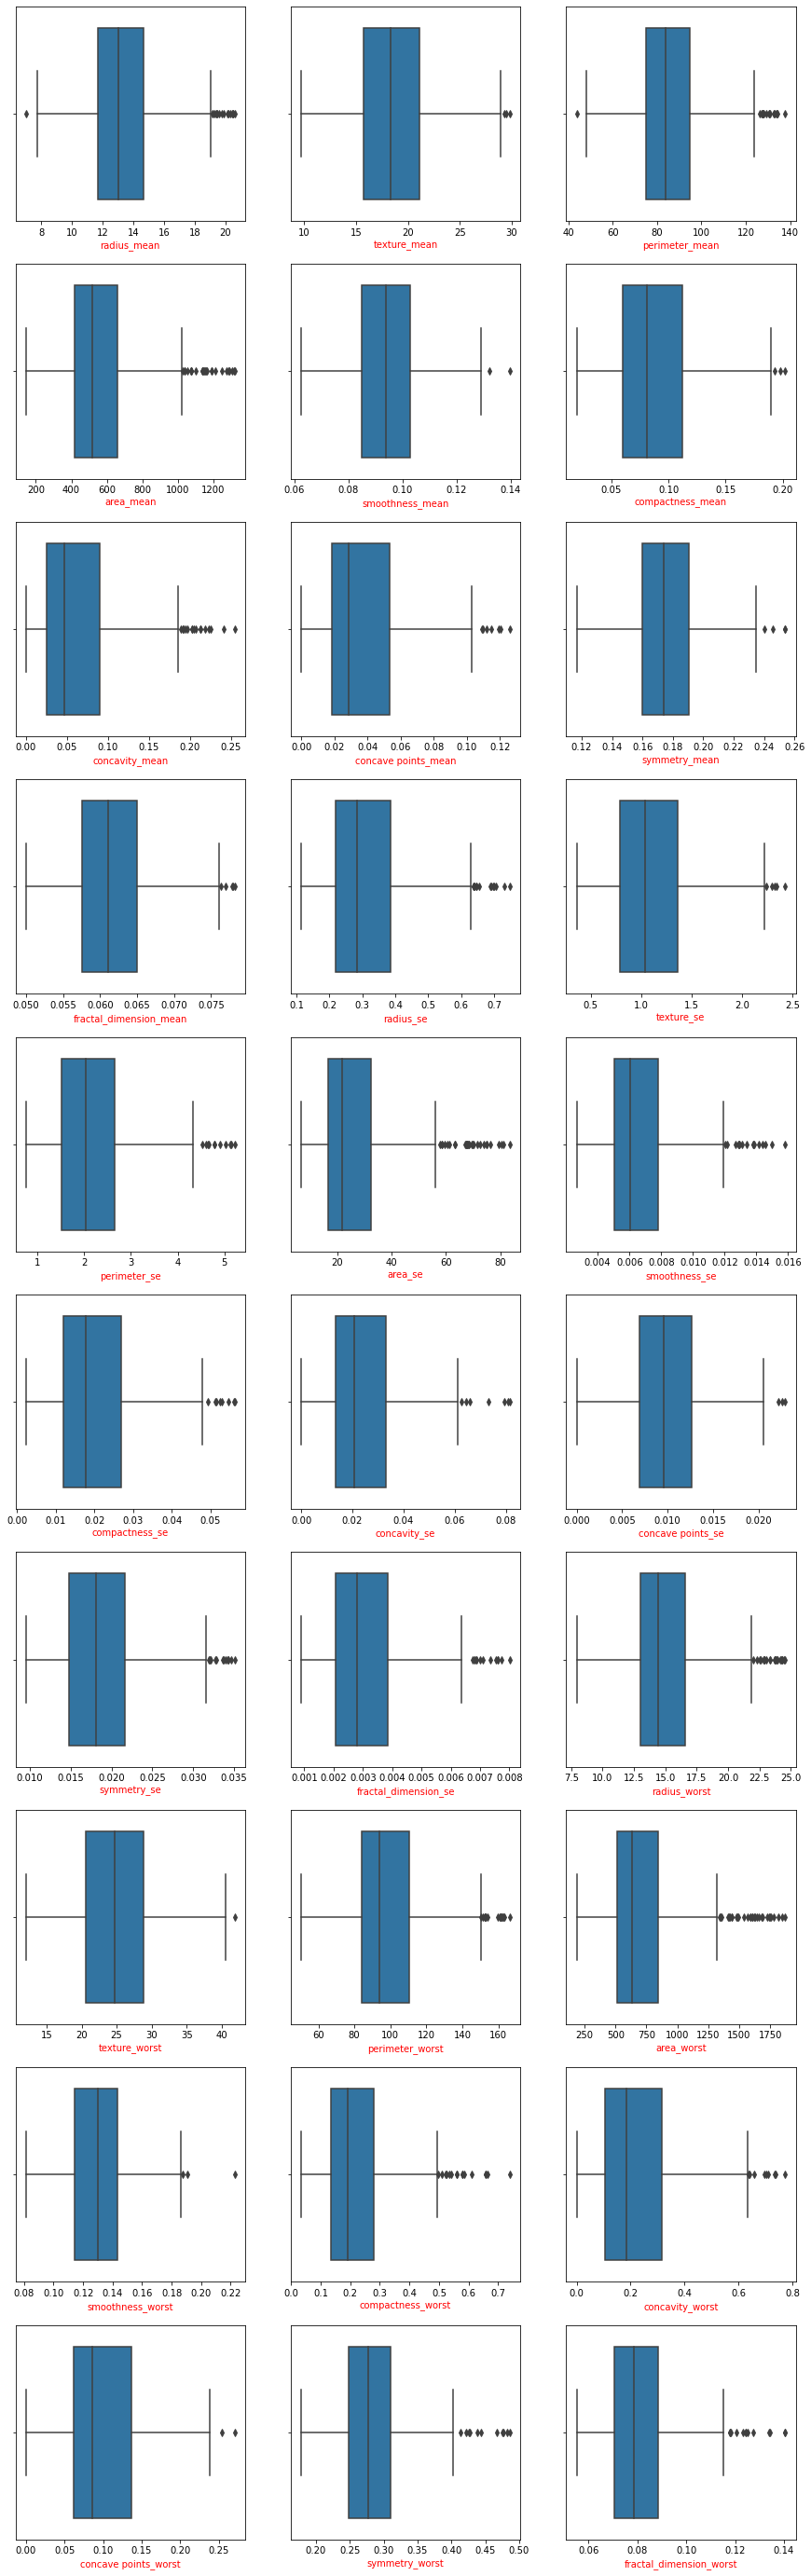

In [127]:
## let's plot data distribution

plt.figure(figsize=(15, 50))

graph = 1

for column in features_new:
    if graph <= 30:
        ax = plt.subplot(10,3,graph)
        sns.boxplot(features_new[column],orient='h')
        plt.xlabel(column,color ='r',fontsize = 10)
    graph+=1
plt.show()  

In [128]:
data['radius_mean'].head(84)

5      12.450
6      18.250
7      13.710
8      13.000
10     16.020
        ...  
110     9.777
111    12.630
113    10.510
114     8.726
115    11.930
Name: radius_mean, Length: 84, dtype: float64

In [ ]:
data.info()

In [129]:
features_new

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.03323,0.1528,0.05697,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.14590,0.09975,0.2948,0.08452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,10.29,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,0.1593,0.06127,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.20000,0.09127,0.2226,0.08283
556,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,10.65,22.88,67.88,347.3,0.1265,0.1200,0.01005,0.02232,0.2262,0.06742
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,0.1454,0.06147,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.36620,0.11050,0.2258,0.08004
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.13260,0.10480,0.2250,0.08321


## Unising SelectKBest feature Selection method to select best features
#### SelectKBest use f_classification to find the best features, where __f_classif__ uses __ANOVA test__.

In [130]:
from sklearn.feature_selection import SelectKBest, f_classif

In [132]:
## Replace Label column (diagnosis) into Binary codes

data['diagnosis'] = data['diagnosis'].replace({'M':1,'B':0})

In [ ]:
data

In [ ]:
X = features_new
Y = data.diagnosis

In [136]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.03323,0.1528,0.05697,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.14590,0.09975,0.2948,0.08452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,10.29,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,0.1593,0.06127,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.20000,0.09127,0.2226,0.08283
556,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,10.65,22.88,67.88,347.3,0.1265,0.1200,0.01005,0.02232,0.2262,0.06742
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,0.1454,0.06147,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.36620,0.11050,0.2258,0.08004
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.13260,0.10480,0.2250,0.08321


In [137]:
best_features = SelectKBest(score_func= f_classif, k=17)

fit = best_features.fit(X,Y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# Concatinate DataFrames
features_scores = pd.concat([df_columns, df_scores],axis=1)
features_scores.columns = ['Feature_Name','Score'] # naming output columns
print(features_scores.nlargest(17,'Score')) # print 17 best features

            Feature_Name       Score
22       perimeter_worst  618.132680
23            area_worst  606.459881
7    concave points_mean  574.800775
20          radius_worst  574.241700
27  concave points_worst  537.564117
6         concavity_mean  498.293510
26       concavity_worst  397.116703
2         perimeter_mean  372.466092
13               area_se  372.154028
3              area_mean  363.536323
0            radius_mean  334.296176
25     compactness_worst  230.011441
5       compactness_mean  195.659243
12          perimeter_se  175.776601
10             radius_se  174.786037
21         texture_worst  120.462661
28        symmetry_worst  101.779876


In [138]:
# These are the best features

new_X = features_new[['concave points_worst','perimeter_worst',
             'concave points_mean','radius_worst',
             'perimeter_mean','area_worst','radius_mean',
             'area_mean','concavity_mean',
             'concavity_worst','compactness_mean',
             'compactness_worst','radius_se',
             'perimeter_se',
             'area_se',
             'texture_worst',
             'smoothness_worst'
            ]]

In [139]:
new_X

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst
5,0.17410,103.40,0.08089,15.47,82.57,741.6,12.45,477.1,0.157800,0.53550,0.17000,0.5249,0.3345,2.217,27.19,23.75,0.1791
6,0.19320,153.20,0.07400,22.88,119.60,1606.0,18.25,1040.0,0.112700,0.37840,0.10900,0.2576,0.4467,3.180,53.91,27.66,0.1442
7,0.15560,110.60,0.05985,17.06,90.20,897.0,13.71,577.9,0.093660,0.26780,0.16450,0.3682,0.5835,3.856,50.96,28.14,0.1654
8,0.20600,106.20,0.09353,15.49,87.50,739.3,13.00,519.8,0.185900,0.53900,0.19320,0.5401,0.3063,2.406,24.32,30.73,0.1703
10,0.09975,123.80,0.03323,19.19,102.70,1150.0,16.02,797.8,0.032990,0.14590,0.06669,0.1551,0.3795,2.466,40.51,33.88,0.1181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.09127,69.57,0.02738,10.84,65.67,357.6,10.29,321.4,0.059990,0.20000,0.07658,0.1710,0.2199,1.437,14.46,34.91,0.1384
556,0.02232,67.88,0.01116,10.65,64.73,347.3,10.16,311.7,0.005025,0.01005,0.07504,0.1200,0.2441,1.648,16.80,22.88,0.1265
558,0.11050,105.90,0.03736,15.48,96.39,733.5,14.59,657.1,0.102900,0.36620,0.13300,0.3171,0.2254,2.224,19.54,27.27,0.1026
560,0.10480,100.20,0.04304,15.30,91.38,706.7,14.05,600.4,0.044620,0.13260,0.11260,0.2264,0.3645,2.888,29.84,33.17,0.1241


In [140]:
scalar = StandardScaler()
X_scalar = scalar.fit_transform(new_X)

In [141]:
X_scalar

array([[ 1.42668097,  0.19951344,  1.64995061, ...,  0.01063732,
        -0.20432077,  2.22743524],
       [ 1.78868766,  2.4112913 ,  1.38925462, ...,  1.72598573,
         0.48008645,  0.621882  ],
       [ 1.07604622,  0.51928855,  0.853863  , ...,  1.53660407,
         0.56410575,  1.59717508],
       ...,
       [ 0.22125555,  0.31054646,  0.00291194, ..., -0.48047103,
         0.41182077, -1.29190065],
       [ 0.11322214,  0.05739116,  0.21782533, ...,  0.18075982,
         1.44455801, -0.30280625],
       [ 0.81449165,  1.23434123,  0.59543723, ...,  1.38188889,
         1.61084621, -0.77205103]])

### Building the model to test unexposed data

In [142]:
# Building the model to test unexposed data

x_train,x_test,y_train,y_test = train_test_split(X_scalar,Y,test_size=0.25,random_state=365)

knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

y_pred= knn.predict(x_test)

### let's display the __confusion matrix__

In [143]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[78,  1],
       [ 4, 25]])

## Let's check the precison and accuracy ?


In [144]:
## How to get precison and accuracy

print(classification_report(y_test,y_pred,digits = 2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        79
           1       0.96      0.86      0.91        29

    accuracy                           0.95       108
   macro avg       0.96      0.92      0.94       108
weighted avg       0.95      0.95      0.95       108



## Cross-Validation

#### We are doing cross_validation to check if we can improve  our built model.

## 2- K-fold Cross Validation

#### Demo for Kfold method

In [145]:
from sklearn.model_selection import KFold,cross_val_score

k_f = KFold(n_splits=3, shuffle=True)
k_f


KFold(n_splits=3, random_state=None, shuffle=True)

In [146]:
for train, test in k_f.split([1,2,3,4,5,6,7,8,9,10]):
    print('train:',train,'test:',test)

train: [0 2 4 6 7 9] test: [1 3 5 8]
train: [1 2 3 5 6 8 9] test: [0 4 7]
train: [0 1 3 4 5 7 8] test: [2 6 9]


#### Cross Validation score to check if our  __model is overfitting__ or not

In [147]:
cross_val_score(knn,X_scalar,Y,cv=5)

# mdole = knn
# X_scalar = input data or feature
# Y = label or target or output
# when we use cv = esplit_values then KFold calculation will happen

## result below is an array with len = 5 , bcz cv = 5

array([0.95348837, 0.95348837, 0.95348837, 0.95348837, 0.96511628])

## the same code as above but just to take the mean of the result.

In [148]:
## the same code as above but just to take the mean of the result.

cross_val_score(KNeighborsClassifier(), X_scalar, Y, cv = 5).mean()

0.9558139534883722

### __Hyperparametric turning__ , help to impore the accuracy

#### Let's used __GridSearchCV__  method for the best parameter to improve the __accuracy__

In [149]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'algorithm':['kd_tree','brute'],
    'leaf_size':[15,18,20],
    'n_neighbors':[3,5,7,13]
}


In [150]:
gridsearch = GridSearchCV(estimator= knn,param_grid=param_grid)

In [151]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18, 20],
                         'n_neighbors': [3, 5, 7, 13]})

In [152]:
## result

gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 5}

#### we will use the best parameters in our K-NN algorithm and check if the accuracy is increasing

In [155]:
# we will use the best parameters in our K-NN algorithm 
# and check if the accuracy is increasing.

knn = KNeighborsClassifier( algorithm='kd_tree',leaf_size=15,n_neighbors=5)

In [157]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=15)

In [158]:
y_pred = knn.predict(x_test)

In [159]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[78,  1],
       [ 4, 25]])

In [162]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        79
           1       0.96      0.86      0.91        29

    accuracy                           0.95       108
   macro avg       0.96      0.92      0.94       108
weighted avg       0.95      0.95      0.95       108



# __Conclusion:__ From the above scores , we can say that, we conducted several tests and no much changes
# Therefore  the model __knn accuracy = 95%__